## Assignment 6
## Multilayer perceptron. Backpropagation.

The goal of this task is to train a multilayer perceptron for classification using backpropagation.

The model is defined in the following way.

$z_1 = W_1x + b_1,$

$h = \tanh(z_1),$

$z_2 = W_2h + b_2,$

$y = \mathrm{softmax}(z_2),$

$L = -\sum_{i} t\log y.$

Where $x$ is the input vector. The cross-entropy loss function is used, where $t$ are targets represented as one-hot vectors. And you also need to add $L_2$ regularization on $W_1$ and $W_2$.

The task is to classify hand-written digits from MNIST dataset, there are 10 classes in total, each corresponds to a different digit. The task is to train the classifier using stochastic gradient descent (SGD). So, you need to compute gradients for each parameter of the model, i.e. $W_1$, $b_1$, $W_2$, $b_2$.

The code below loads the dataset, there are 1797 samples in total. You need to split the dataset into two parts, 80 percent of the samples for the training set and the remaining 20 percent for the test set. Make sure that both contain all kinds of digits. Each of the samples in a greyscale image 8x8 which is represented as a 64-dimensional vector when given as an input to the neural network classifier. Use dimension 50 for the hidden layer $h$ in the beginning. You are welcome to play with this parameter after you finish the implementation to see how it affects the results.

Plot the value of the loss function after each epoch and also plot the classification accuracy for the training and the test set on the same plot.

**Bonus.** 
Besides cross-entropy loss, you are welcome to try multi-class hinge loss described on the following web-page and compare it to cross-entropy loss in terms of accuracy. Try to avoid using for loops in your implementation so that your code is fully vectorized.
http://cs231n.github.io/linear-classify/


(1437, 2) (360, 2) (1797, 2)


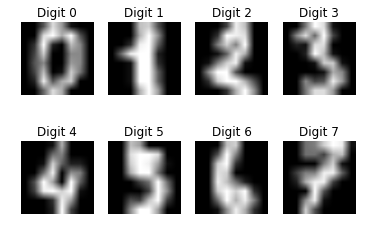

In [271]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from scipy.misc import derivative

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')
    plt.title('Digit %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
dataset = np.array(list(zip(data, digits.target)))
np.random.shuffle(dataset)
train_index = int(n_samples * 0.8)

train = dataset[:train_index]
test = dataset[train_index:]


print(train.shape, test.shape, dataset.shape)

In [291]:
def sigmoid(x):
    return 1 / (1 + np.exp(x))

def softmax(x):
    if x.ndim == 1:
        return np.exp(x) / np.sum(np.exp(x))
    
    _x = np.zeros(x.shape)
    _sum = np.sum(np.exp(x), axis=1)
    for i in range(x.shape[0]):
        _x[i] = np.exp(x[i]) / _sum[i]
    return _x

def g(x):
    return np.tanh(x)
    
def network(x, theta, verbose=True):
    X = np.array(x)
    W1 = theta[0][0]
    b1 = theta[0][1]
    
    W2 = theta[1][0]
    b2 = theta[1][1]
    
    if verbose:
        print(W1.shape, 'W1.shape')
        print(b1.shape, 'b1.shape')
        print(W2.shape, 'W2.shape')
        print(b2.shape, 'b2.shape')
    
    layer1_pre = W1.dot(X.T)
    for i in range(b1.shape[0]):
        layer1_pre[i] += b1[i]
    layer1_act = g(layer1_pre)
    
    if verbose:
        print(layer1_act.shape, 'layer1_act.shape')

    out_pre = W2.dot(layer1_act)
    for i in range(b2.shape[0]):
        out_pre[i] += b2[i]
        
    out_act = softmax(out_pre.T)
    
    if verbose:
        print(out_act.shape, 'out_act.shape')
        
    return out_act
    
def loss(x, y, verbose=True):
    def cost_function(theta):
        _predicted = network(x, theta, verbose)
        _sum = 0
        for i in range(y.shape[0]):
            _sum += np.log(_predicted[i][y[i]])

        return -_sum / y.shape[0] # normalize
    
    return cost_function


In [293]:
x_train = np.stack(train[:, 0])
y_train = np.stack(train[:, 1])

x_test = np.stack(test[:, 0])
y_test = np.stack(test[:, 1])

W1 = np.random.random((50, x_train.shape[1]))
b1 = np.random.random(50)

W2 = np.random.random((10, 50))
b2 = np.random.random(10)

theta = []
theta.append([W1, b1])
theta.append([W2, b2])
theta = np.array(theta)

_loss = loss(x_test, y_test, verbose=False)
_loss


3.0061383170955627

In [297]:
# TODO theta.shape = (123132, ), then we should reverse it
# or write function which will reshape this into vector to be able to calculate the gradient
def grad(func, x):
    h = 1e-6
    _grad = []
    for i in range(x.shape[0]):
        _x = x
        _x[i] += h
        _grad.append((func(_x[i]) - func(x)) / h)
        
    return np.array(_grad)

grad(_loss, theta)

AttributeError: 'numpy.float64' object has no attribute 'dot'